# Simple outlier detection

#### Solution by Roberto Medina

Your task to compute and visualize outliers in a time series, where you need to prepare and aggregate
the underlying raw data upfront.

### Read Data

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data from file 'train.csv' 
# (assumes file is in the same directory that python process is located)
df = pd.read_csv("train.csv", sep = ',') 

## CTR over time

The first task is to aggregate data by “hour”, calculate CTR and plot the resulting time series.

Text(0, 0.5, 'CTR')

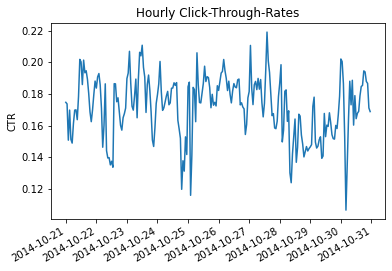

In [3]:
# Transform hour to datetime format
df["dt_hour"] = pd.to_datetime(df["hour"], format="%y%m%d%H")
# Aggregate by dt_hour
hourly_data = df.groupby(['dt_hour']).agg({'click': 'sum'})
hourly_data['impressions'] = df.groupby(['dt_hour']).agg({'click': 'count'})
hourly_data['ctr'] = hourly_data['click']/hourly_data['impressions']
# Plot ctr timeseries
plt.plot(hourly_data.ctr)
plt.gcf().autofmt_xdate()
plt.title('Hourly Click-Through-Rates')
plt.ylabel('CTR')

## Outlier Detection

Second, build a simple outlier detection algorithm based on a “moving average”. A data point is
identified as an outlier, if it is more than 1.5 standard deviations apart from its calculated moving
average (for simplicity’s sake, we will assume a Gaussian distribution here).
The outcome of this task is a plot, that highlights all found outliers.

In [4]:
# Moving average over a period of x hours
# x was not specified in the instructions, arbitrarily set as 5 in this code
x = 5
# Shortened pointer to moving average variable
c = 'ctr_moving_average'+'_'+str(x)
# Calculate moving average and SD cutoffs
hourly_data[c] = hourly_data.ctr.rolling(x, min_periods=1).mean()
threshold = 1.5
sd = hourly_data[c].std()
cutoff_high = hourly_data[c].mean() + sd*threshold
cutoff_low = hourly_data[c].mean() - sd*threshold
# Identify index locations of CTR above moving average SD cutoffs
outliers_high = hourly_data['ctr'][ hourly_data['ctr']>cutoff_high ]
outliers_low = hourly_data['ctr'][ hourly_data['ctr']<cutoff_low ]

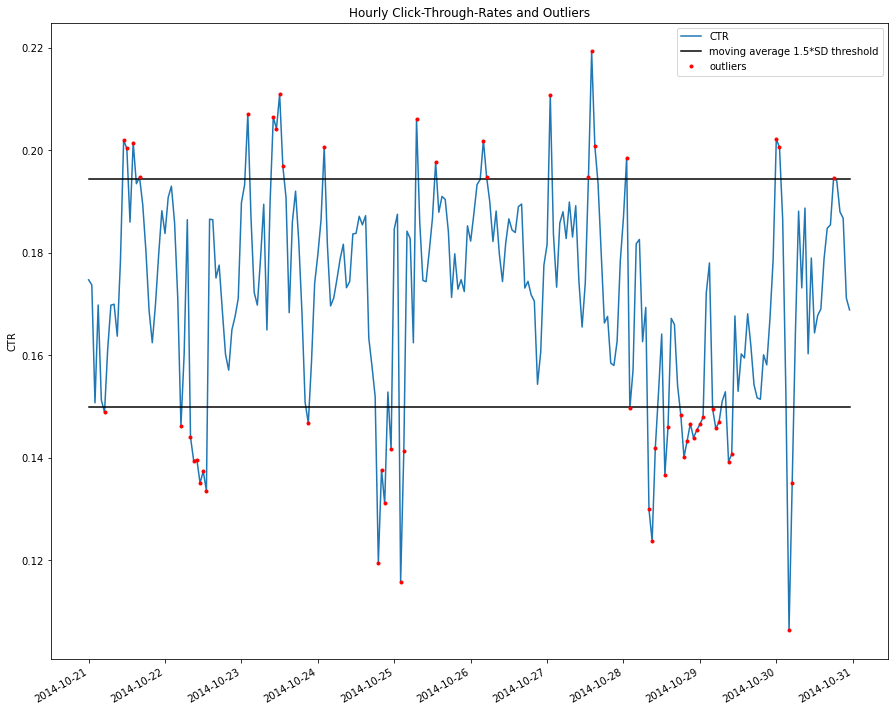

In [6]:
# Plot ctr timeseries
fig = plt.figure(figsize=(15,13))
plt.plot(hourly_data.ctr, label = 'CTR')
# Plot outliers
plt.plot(hourly_data[c]*0+cutoff_high, color = 'black',label='moving average' + ' '+str(threshold)+'*SD threshold')
plt.plot(hourly_data[c]*0+cutoff_low, color = 'black')
plt.plot(outliers_high, 'r.', label='outliers')
plt.plot(outliers_low, 'r.')
# Fix axis and set labels
plt.gcf().autofmt_xdate()
plt.title('Hourly Click-Through-Rates and Outliers')
plt.ylabel('CTR')
plt.legend()